In [1]:
from __future__ import print_function
import torch
import torchvision
import torchvision.transforms as transforms

x=torch.Tensor(5,3)
print (x)

In [2]:
x=torch.rand(5,3)
print(x)


 0.7533  0.8155  0.3305
 0.3168  0.0323  0.0312
 0.8773  0.9985  0.8860
 0.7133  0.2578  0.2070
 0.7418  0.2439  0.6039
[torch.FloatTensor of size 5x3]



In [3]:
y=torch.rand(5,3)
print(y)


 0.4246  0.7505  0.3682
 0.8165  0.6692  0.1548
 0.6137  0.6637  0.8938
 0.8527  0.1248  0.3515
 0.5231  0.4775  0.9608
[torch.FloatTensor of size 5x3]



In [4]:
print(torch.add(x,y))


 1.1779  1.5660  0.6986
 1.1333  0.7015  0.1860
 1.4911  1.6622  1.7798
 1.5660  0.3826  0.5585
 1.2648  0.7214  1.5647
[torch.FloatTensor of size 5x3]



In [5]:
y.add_(x)


 1.1779  1.5660  0.6986
 1.1333  0.7015  0.1860
 1.4911  1.6622  1.7798
 1.5660  0.3826  0.5585
 1.2648  0.7214  1.5647
[torch.FloatTensor of size 5x3]

In [6]:
print(x[:,-1])


 0.3305
 0.0312
 0.8860
 0.2070
 0.6039
[torch.FloatTensor of size 5]



In [7]:
if torch.cuda.is_available():
    x=x.cuda()
    y=y.cuda()
    x+y
    print(x+y)

In [8]:
import torch
from torch.autograd import Variable

In [9]:
x=Variable(torch.ones(2,2),requires_grad=True)
y=x+2
print(y.grad_fn)
z=y*y*3
out=z.mean()
out.backward(retain_graph=True)
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [10]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
  388.6443
 1693.0378
  665.6080
[torch.FloatTensor of size 3]



In [11]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [12]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [13]:
params = list(net.parameters())
print(len(params))
print(params[4].size())  # conv1's .weight

10
torch.Size([120, 400])


In [14]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)
net.zero_grad()
out.backward(torch.randn(1, 10))
print(out)



Variable containing:
-0.0041  0.1203  0.0135  0.0175  0.0959  0.0993  0.0751 -0.0321 -0.1647  0.2055
[torch.FloatTensor of size 1x10]

Variable containing:
-0.0041  0.1203  0.0135  0.0175  0.0959  0.0993  0.0751 -0.0321 -0.1647  0.2055
[torch.FloatTensor of size 1x10]



In [15]:
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])



BackPropogation

In [16]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  5.2048
 -1.9514
 -0.9197
 -7.3916
 -1.1481
 -5.2901
[torch.FloatTensor of size 6]



Updating weights

In [17]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
print(net.parameters) 
params = list(net.parameters())
print(params[9])



<bound method Module.parameters of Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)>
Parameter containing:
 0.0153
 0.0663
 0.0290
 0.0427
 0.0693
 0.1035
 0.0648
-0.0777
-0.0573
 0.1164
[torch.FloatTensor of size 10]



Using tourch.optim

In [18]:
import torch.optim as optim

print(net.parameters) 
params = list(net.parameters())
print(params[9])

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
print(net.conv1.bias.grad)
optimizer.step()    # Does the update

<bound method Module.parameters of Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)>
Parameter containing:
 0.0153
 0.0663
 0.0290
 0.0427
 0.0693
 0.1035
 0.0648
-0.0777
-0.0573
 0.1164
[torch.FloatTensor of size 10]

Variable containing:
-0.0352
-0.1036
-0.0845
-0.0340
-0.0406
-0.0552
[torch.FloatTensor of size 6]



In [19]:
import torch
import torchvision
import torchvision.transforms as transforms


In [20]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [21]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [22]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


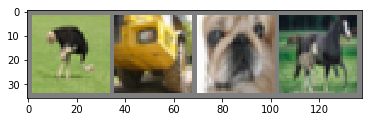

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
# random examples
dataiter= iter(trainloader)
images,labels=dataiter.next()

# print(dataiter.next())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [24]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [26]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.191
[1,  4000] loss: 1.891
[1,  6000] loss: 1.681
[1,  8000] loss: 1.568
[1, 10000] loss: 1.489
[1, 12000] loss: 1.458
[2,  2000] loss: 1.384
[2,  4000] loss: 1.361
[2,  6000] loss: 1.329
[2,  8000] loss: 1.321
[2, 10000] loss: 1.277
[2, 12000] loss: 1.256
Finished Training


GroundTruth:    cat  ship  ship plane


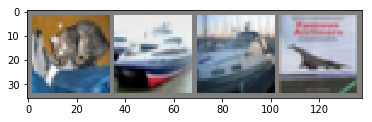

In [27]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [28]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 51 %


In [29]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 88 %
Accuracy of  bird : 65 %
Accuracy of   cat : 17 %
Accuracy of  deer : 24 %
Accuracy of   dog : 43 %
Accuracy of  frog : 63 %
Accuracy of horse : 43 %
Accuracy of  ship : 66 %
Accuracy of truck : 41 %
